# Heart Disease Classification

In [1]:
from utils import *

### Exploratory Data Analysis (EDA)

In [2]:
df = get_data()
df.head(5)

There are not missing values in data.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Five Number Summary

In [3]:
df_stats = get_descriptive_stats(df)
df_stats

,count,mean,std,min,25%,50%,75%,max,variance
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0,82.484558
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0,0.217166
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0,1.065132
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0,307.586453
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0,2686.426748
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0,0.126877
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0,0.276528
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0,524.646406
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0,0.220707
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2,1.348095


### Historgram using Kernel Density Estimator (KDE)

**Logic for each feature:**

1. Feature Type
    - *Is the feature continuous or discrete?* 
    - For discrete features, we will use rectangular bins.
    - For continuous features, we will have to do more in-depth analysis to decide on bin shape (kernel) and bandwidth.

2. Distribution Type
    - *Only for continuous features*
    - Normally distributed; Bell-curve; symmetric;
    - Multiple peaks or clusters: if it has more than one distinct local maxima
    - Skewed or outlier: If the distribution is asymmetrical 
  
3. Bin Shape Decision
    - *Based on Distribution Type*
    - Normal Distribution => Gaussian Kernel
    - Multiple Peaks or clusters => Triangular Kernel
    - Skewed Distribution => Quadratic Kernel
  
4. Bandwidth Decision
    - *Depends on Bin Shape*
    - Smaller bandwidth => spikier (noiser) density estimation
    - Larger bandwidth => over smoothed (lose shape)

In [4]:
for c in df.columns:
    print(f"{c} unique values\n{df[c].unique()}\n\n")

age unique values
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]


sex unique values
[1 0]


cp unique values
[3 2 1 0]


trestbps unique values
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]


chol unique values
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293

### 1. Feature Types

From the above printing of unique values from each feature, we conclude that our lists of discrete and continuous features are such:

**Discrete Features**: `sex`,`cp`,`fbs`,`restecg`,`exang`,`slope`,`ca`,`thal`,`target`

**Continuous Features**: `age`,`trestbps`,`chol`,`thalach`,`oldpeak`

In [5]:
d_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
c_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 2. Distribution Types

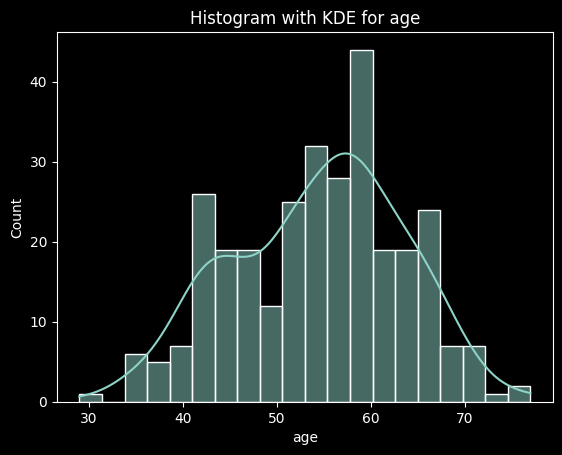

In [6]:
c = 0
d_plot_histogram(df[c_features[c]], 20)
c += 1

**Distribution Interpretation for `age`:**

Normal Distribution

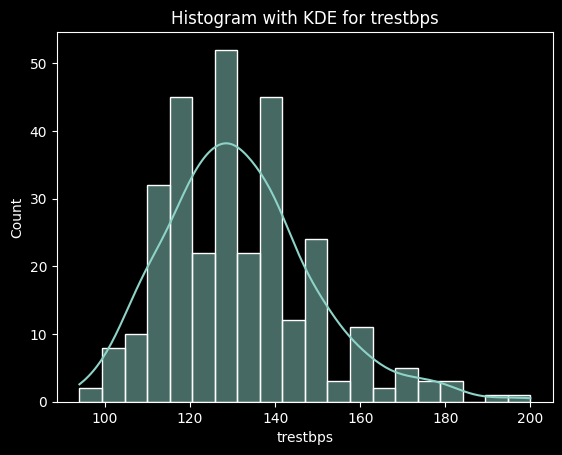

In [7]:
d_plot_histogram(df[c_features[c]], 20)
c += 1

**Distribution Interpretation for `trestbps`:**

Normal

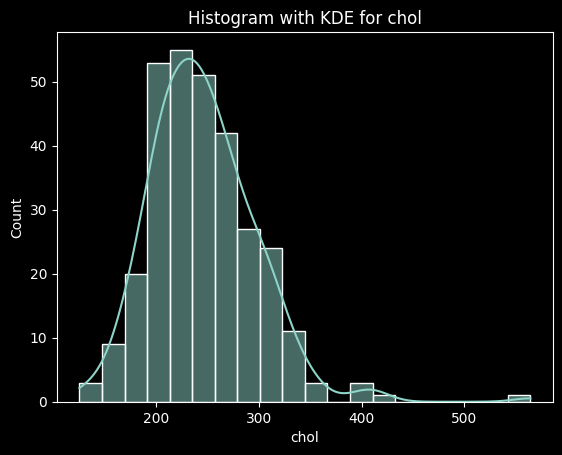

In [8]:
d_plot_histogram(df[c_features[c]], 20)
c += 1

**Distribution Interpretation for `chol`:**

Skewed Distribution: Longer tail on the right (chol values > 350)

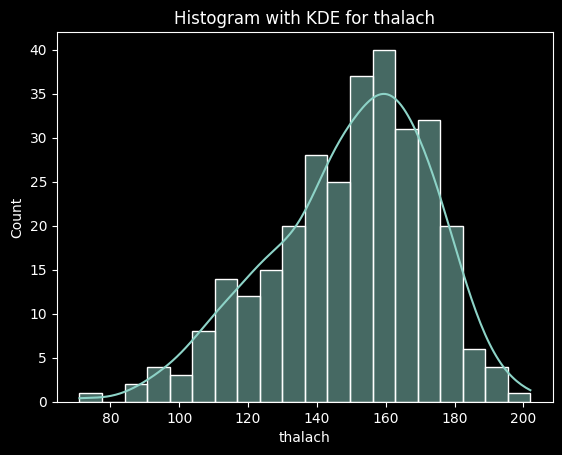

In [9]:
d_plot_histogram(df[c_features[c]], 20)
c += 1

**Distribution Interpretation for `thalach`:**

Skewed Distribution: Longer tail on the left (thalach values < 120)

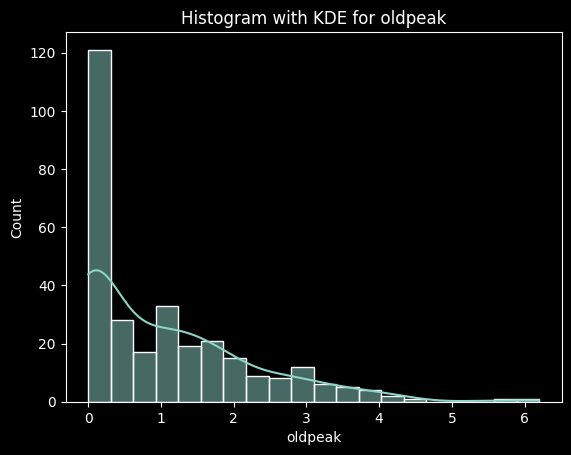

In [10]:
d_plot_histogram(df[c_features[c]], 20)
c += 1

**Distribution Interpretation for `oldpeak`:**

Skewed Distribution: Longer tail on the right (oldpeak values > 0)

### 3. Bin Shape Decision

`age` = Gaussian Kernel

`trestbps` = Gaussian Kernel

`chol` = Quadratic Kernel

`thalach` = Quadratic Kernel

`oldpeak` = Quadratic Kernel

### 4. Bandwidth Decision

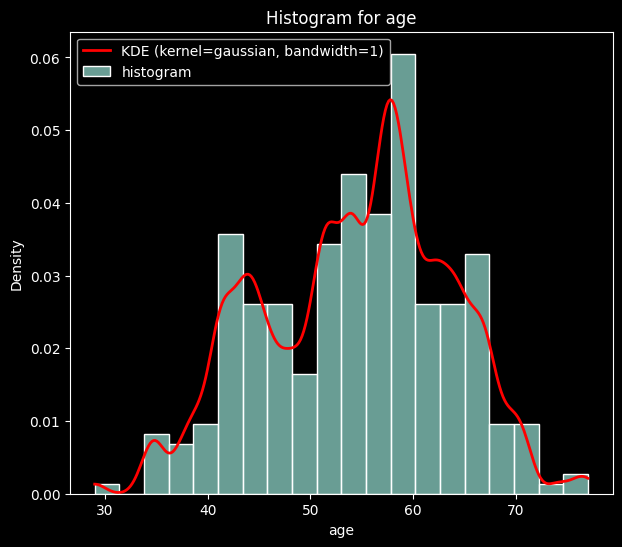

In [11]:
c_plot_histogram(df['age'], kernel='gaussian', bw=1)

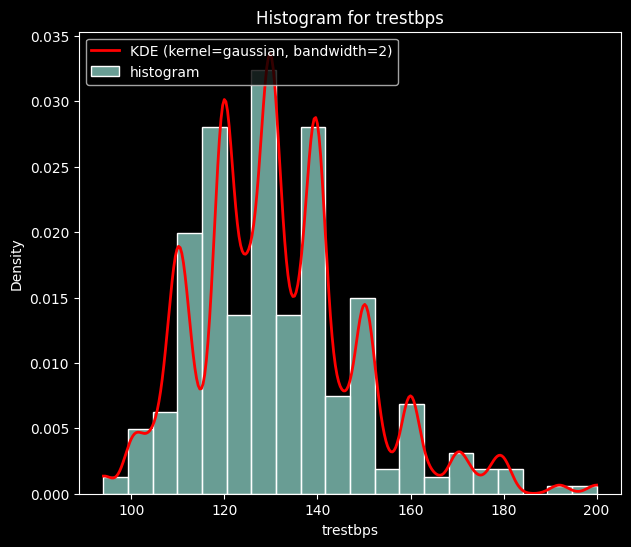

In [12]:
c_plot_histogram(df['trestbps'], kernel='gaussian', bw=2)

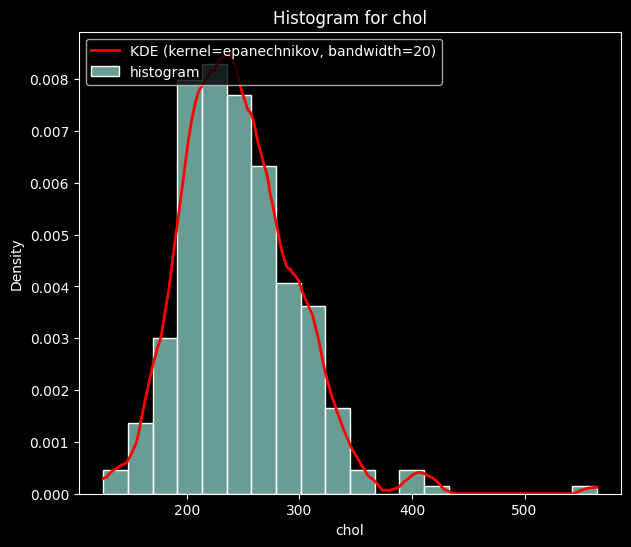

In [13]:
c_plot_histogram(df['chol'], bw=20)

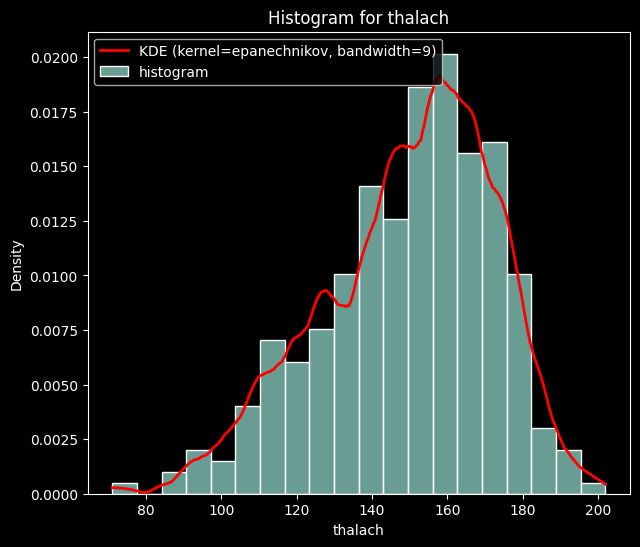

In [14]:
c_plot_histogram(df['thalach'], bw=9)

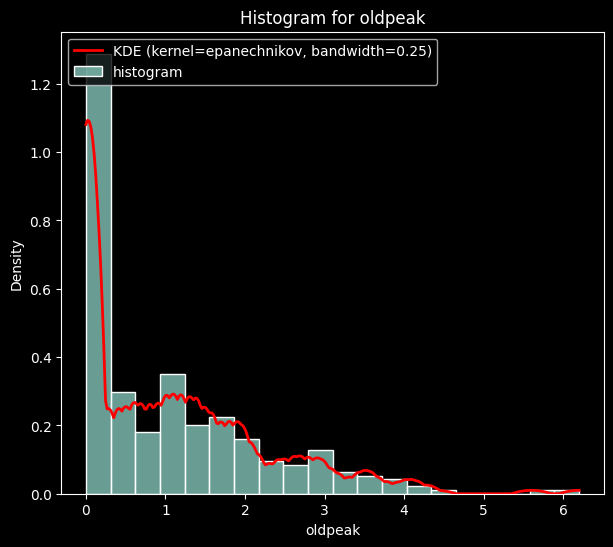

In [15]:
c_plot_histogram(df['oldpeak'], bw=.25)

### Feature Engineering

In [16]:
df['age_cholesterol'] = df['age'] * df['chol']
df['thalach_slope'] = df['thalach'] * df['slope']
df['cp_thalach'] = df['cp'] * df['thalach']
df['slope_restecg'] = df['slope'] * df['restecg']
df['cp_thalach_slope_restecg'] = df['cp'] * df['thalach'] * df['slope'] * df['restecg']


### Correlation Coefficients Heatmap

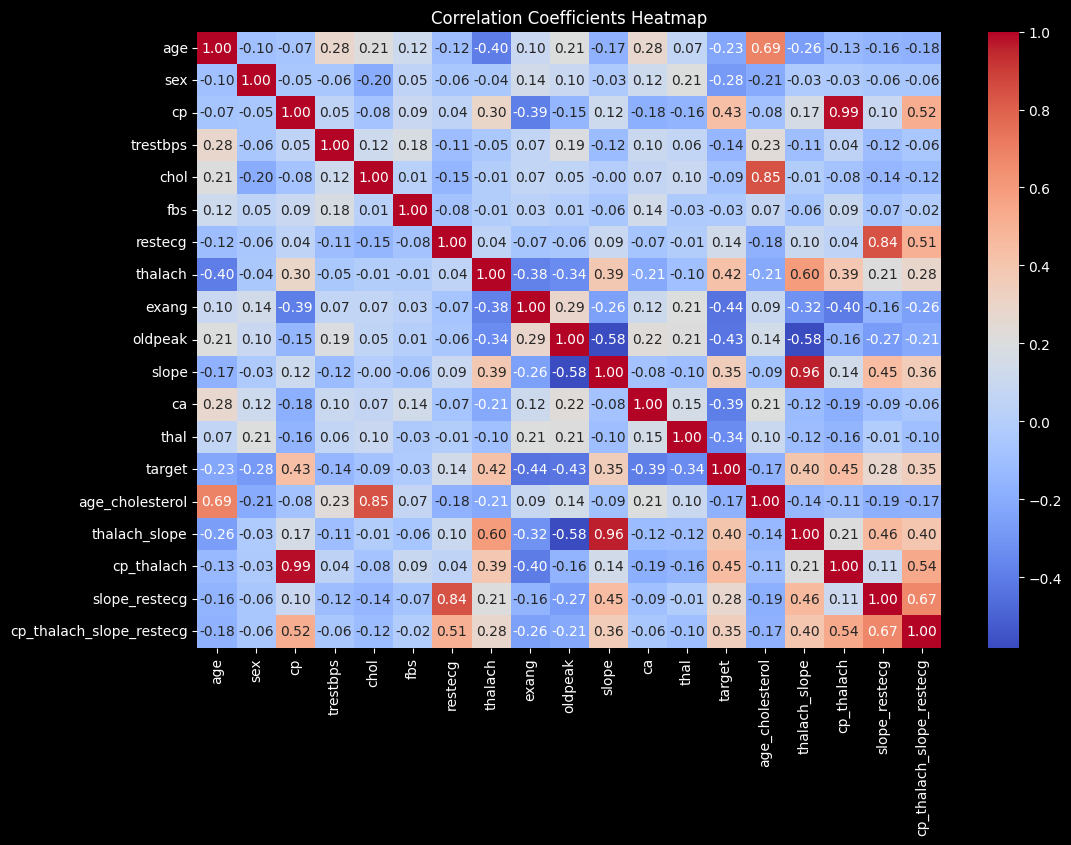

target                      1.000000
cp_thalach                  0.453050
cp                          0.433798
thalach                     0.421741
thalach_slope               0.402883
slope                       0.345877
cp_thalach_slope_restecg    0.345023
slope_restecg               0.277258
restecg                     0.137230
fbs                        -0.028046
chol                       -0.085239
trestbps                   -0.144931
age_cholesterol            -0.174073
age                        -0.225439
sex                        -0.280937
thal                       -0.344029
ca                         -0.391724
oldpeak                    -0.430696
exang                      -0.436757
Name: target, dtype: float64


In [17]:
plot_correlation_matrix(df)

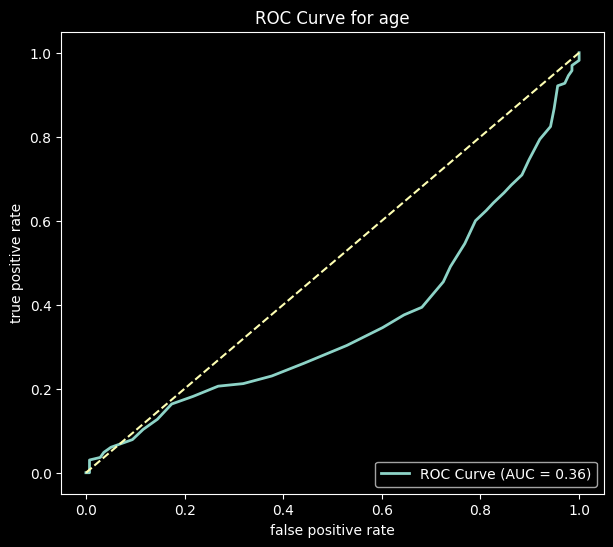

feature age auc score = 0.36


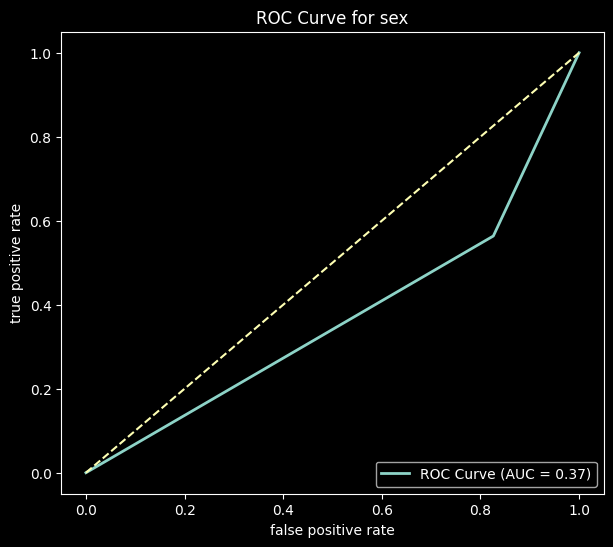

feature sex auc score = 0.37


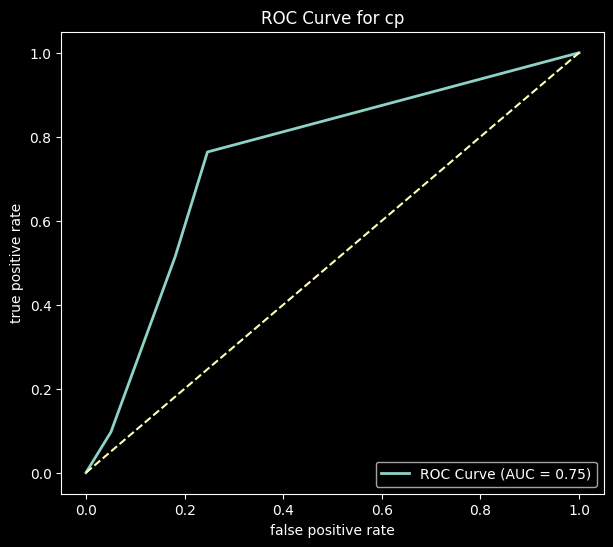

feature cp auc score = 0.75


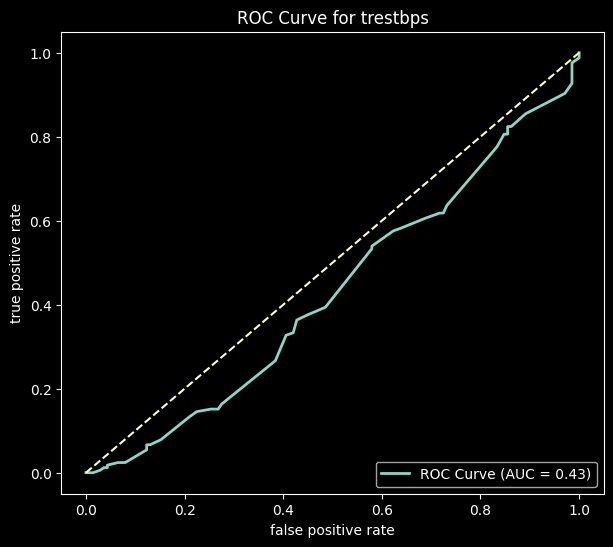

feature trestbps auc score = 0.43


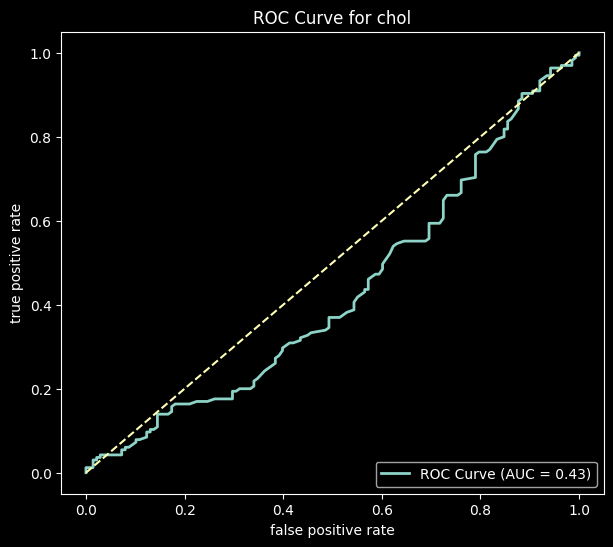

feature chol auc score = 0.43


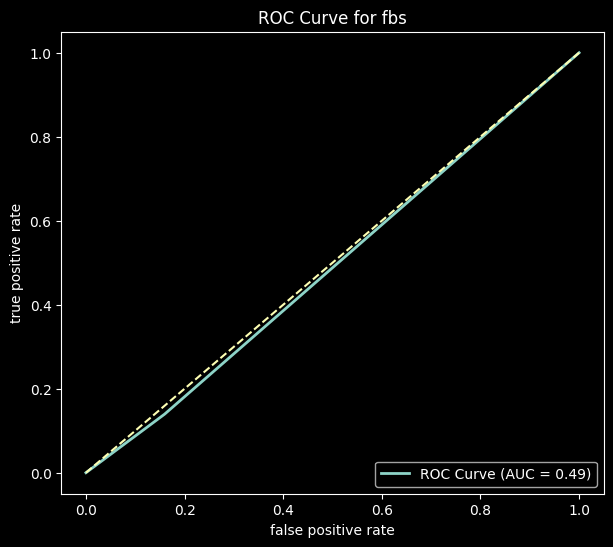

feature fbs auc score = 0.49


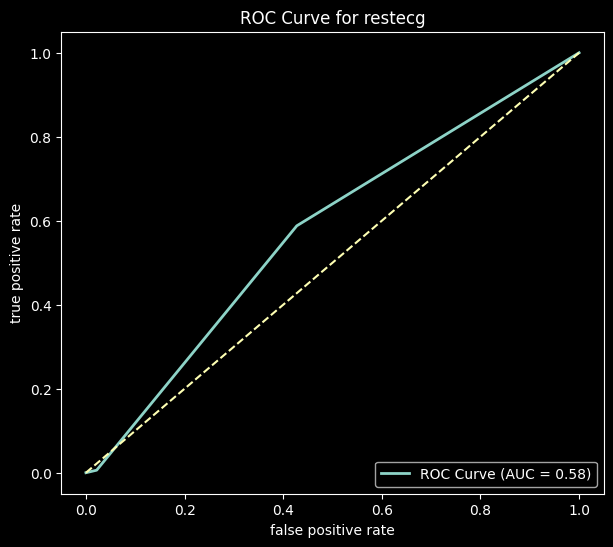

feature restecg auc score = 0.58


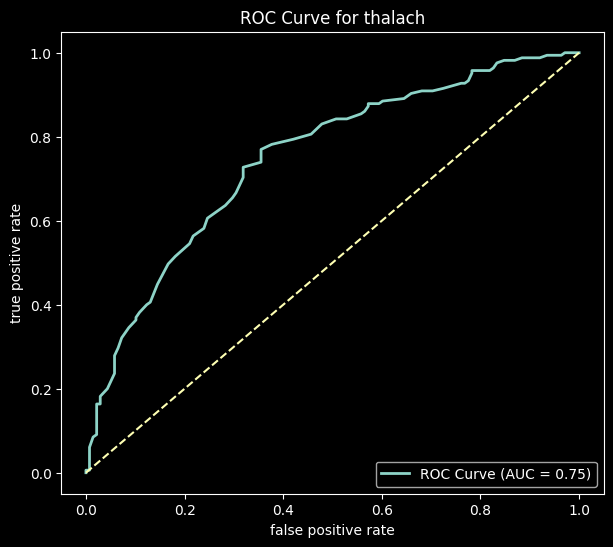

feature thalach auc score = 0.75


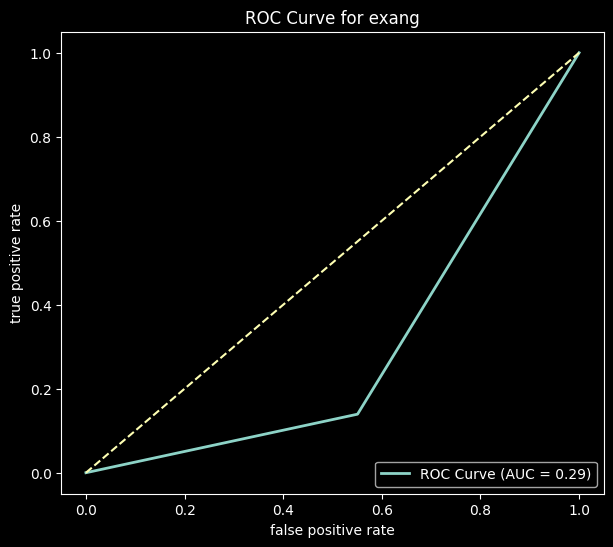

feature exang auc score = 0.29


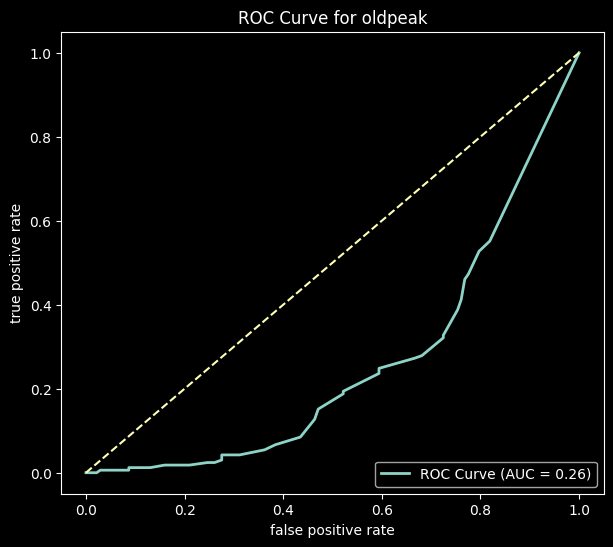

feature oldpeak auc score = 0.26


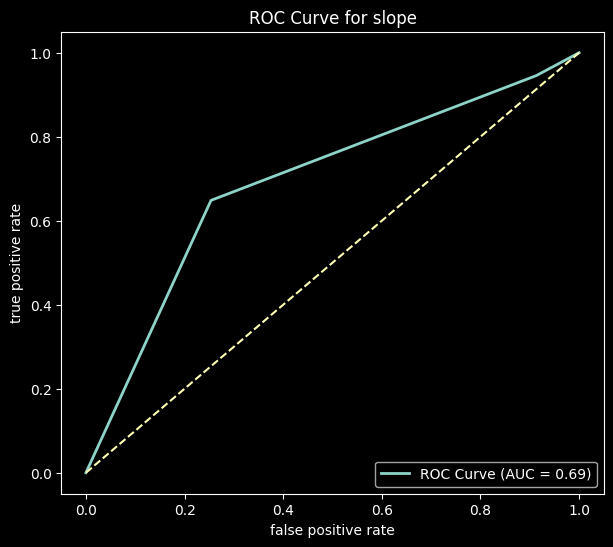

feature slope auc score = 0.69


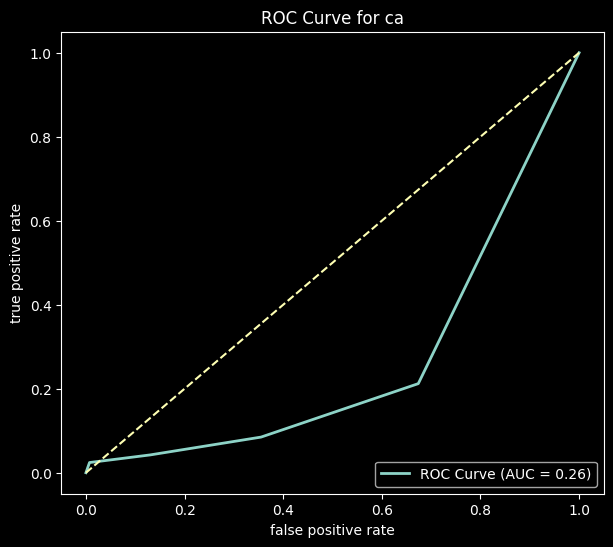

feature ca auc score = 0.26


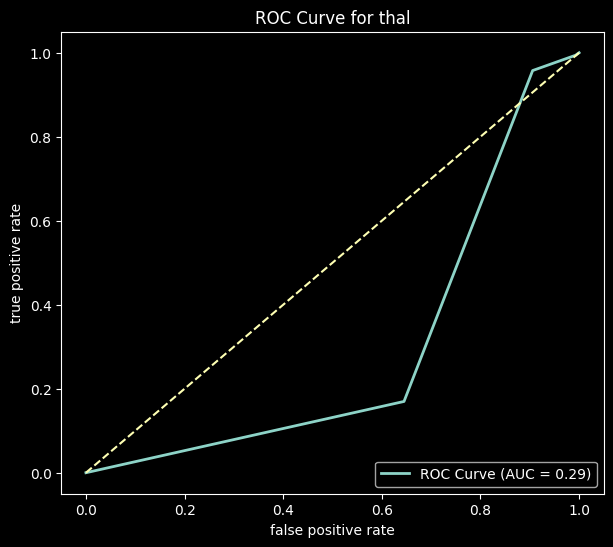

feature thal auc score = 0.29


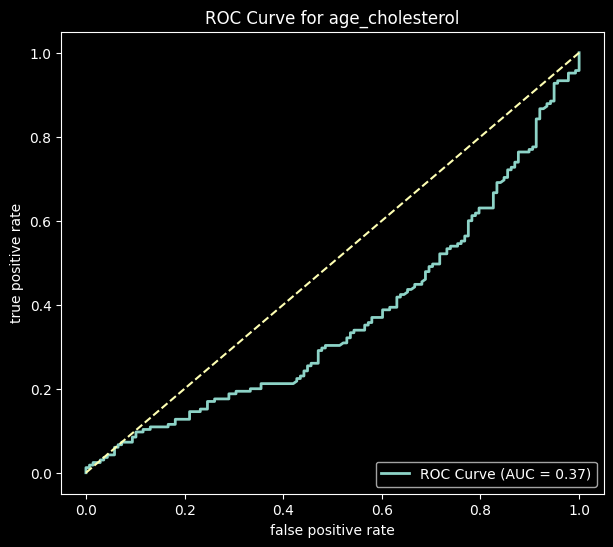

feature age_cholesterol auc score = 0.37


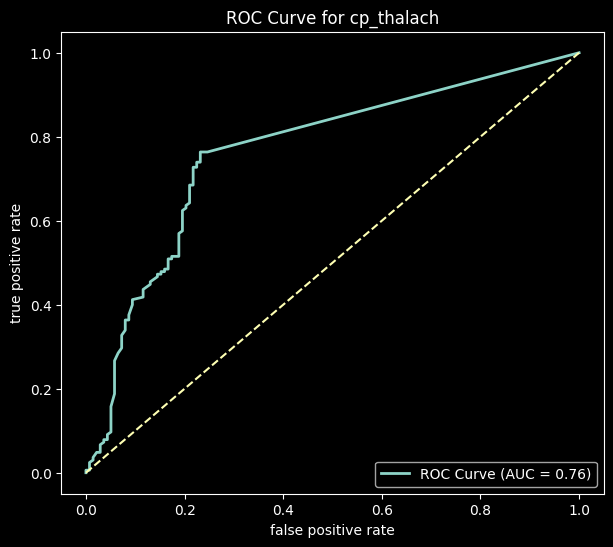

feature cp_thalach auc score = 0.76


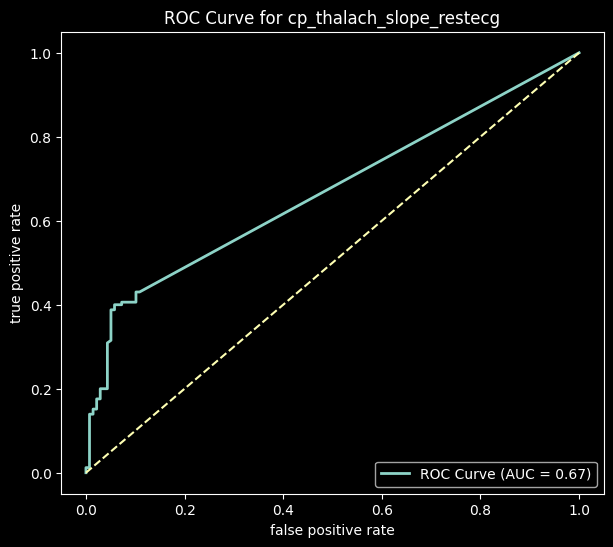

feature cp_thalach_slope_restecg auc score = 0.67
dropping age from data...
dropping sex from data...
dropping trestbps from data...
dropping chol from data...
dropping fbs from data...
dropping exang from data...
dropping oldpeak from data...
dropping ca from data...
dropping thal from data...
dropping age_cholesterol from data...


In [35]:
drop_cols = []
for c in df.columns:
    if c != 'target':
        auc = ROC(df[c], df['target'], plot=True)
        print(f"feature {c} auc score = {auc:.2f}")
        if auc < 0.5:
            drop_cols.append(c)

for i in drop_cols:
    print(f"dropping {i} from data...")

df.drop(columns=drop_cols, inplace=True)

In [36]:
df.columns

Index(['cp', 'restecg', 'thalach', 'slope', 'target', 'cp_thalach',
       'cp_thalach_slope_restecg'],
      dtype='object')

### Normalization Strategy

For our discrete features, they are already one-hot encoded and don't need normalization.

For our continuous features with normal distribution, we will use z-score normalization. For our continuous features with skewed distribution, we will apply log transformation to reduce the skewness and then use z-score normalization. 

We are throwing out any features that have multimodal distribution. 

We start by finding the distributions of our engineered features

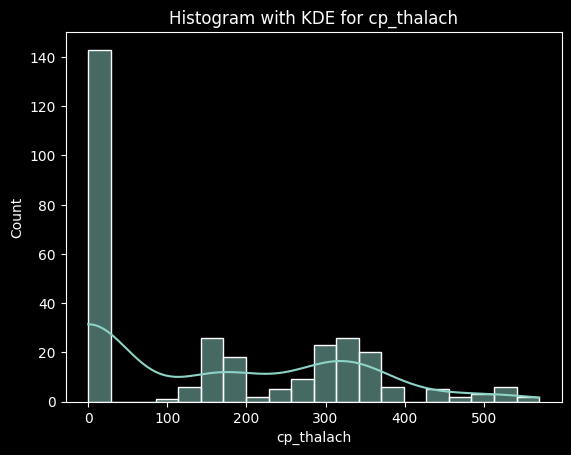

In [22]:
d_plot_histogram(df['cp_thalach'])

cp_thalach has skewed distribution

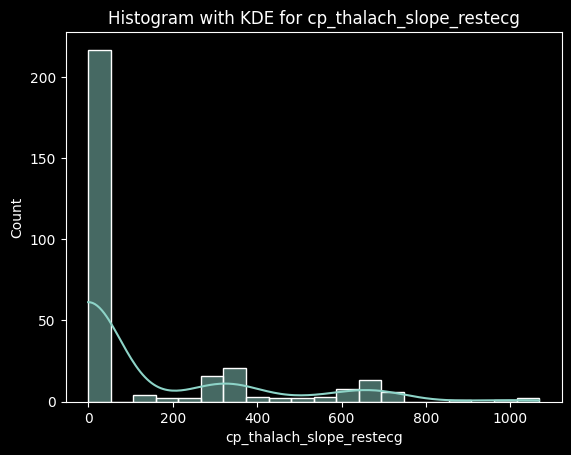

In [24]:
d_plot_histogram(df['cp_thalach_slope_restecg'])

cp_thalach_slope_restecg has skewed distribution

In [37]:
df.columns

Index(['cp', 'restecg', 'thalach', 'slope', 'target', 'cp_thalach',
       'cp_thalach_slope_restecg'],
      dtype='object')

### Final Features:

`cp`: Discrete. No normalization.

`thalach`: Continuous. Skewed distribution. Log transform -> Z-score normalization.

`slope`: Discrete. No normalization.

`target`: Discrete. No normalization. (Also target column)

`cp_thalach`: Continuous. Skewed distribution. Log transform -> Z-score normalization.

`cp_thalach_slope_restecg`: Continuous. Skewed distribution. Log transform -> Z-score normalization.


### Train Test Split for Logistic Regression

In [44]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [45]:
# Normalization
skewed = ['thalach', 'cp_thalach', 'cp_thalach_slope_restecg']
normal = []
X_train, X_test = normalize_skewed_features("z", X_train, X_test, skewed)
#X_train, X_test = normalize_skewed_features("MinMax", X_train, X_test, skewed)


In [40]:
X_train

,cp,restecg,thalach,slope,cp_thalach,cp_thalach_slope_restecg
62,3,0,0.941215,1,1.000000,0.000000
127,2,1,0.845723,2,0.920622,0.937022
111,2,1,0.851283,2,0.921532,0.937852
287,1,0,0.800046,2,0.804417,0.000000
108,1,1,0.788280,2,0.802495,0.829284
...,...,...,...,...,...,...
203,2,0,0.714506,1,0.899127,0.000000
255,0,0,0.695146,1,0.000000,0.000000
72,1,0,1.000000,2,0.837070,0.000000
235,0,1,0.851283,2,0.000000,0.000000


### Logistic Regression Model

Logistic Regression Model Test Accuracy = 0.70

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        30
           1       0.70      0.74      0.72        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



/Users/rileyoest/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rileyoest/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

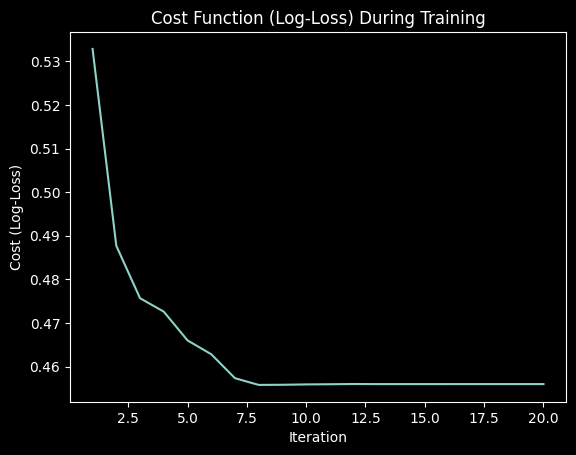

In [46]:
RunLogisticRegression(X_train, y_train, X_test, y_test, max_iter=20)

### Train Val Test Split For Neural Network

In [49]:
# Splitting train, validation and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#X_train, X_test = normalize_skewed_features("MinMax", X_train, X_test, skewed)
X_train, X_test = normalize_skewed_features("z", X_train, X_test, skewed)


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.4, random_state=1)

Training Neural Network...
Epoch 1/200 - train loss: 0.6633 - val loss: 0.6596
Epoch 2/200 - train loss: 0.6541 - val loss: 0.6512
Epoch 3/200 - train loss: 0.6454 - val loss: 0.6431
Epoch 4/200 - train loss: 0.6371 - val loss: 0.6354
Epoch 5/200 - train loss: 0.6293 - val loss: 0.6280
Epoch 6/200 - train loss: 0.6219 - val loss: 0.6209
Epoch 7/200 - train loss: 0.6147 - val loss: 0.6141
Epoch 8/200 - train loss: 0.6078 - val loss: 0.6076
Epoch 9/200 - train loss: 0.6011 - val loss: 0.6013
Epoch 10/200 - train loss: 0.5947 - val loss: 0.5953
Epoch 11/200 - train loss: 0.5886 - val loss: 0.5894
Epoch 12/200 - train loss: 0.5827 - val loss: 0.5839
Epoch 13/200 - train loss: 0.5771 - val loss: 0.5787
Epoch 14/200 - train loss: 0.5718 - val loss: 0.5737
Epoch 15/200 - train loss: 0.5668 - val loss: 0.5692
Epoch 16/200 - train loss: 0.5621 - val loss: 0.5650
Epoch 17/200 - train loss: 0.5577 - val loss: 0.5611
Epoch 18/200 - train loss: 0.5536 - val loss: 0.5575
Epoch 19/200 - train loss: 0

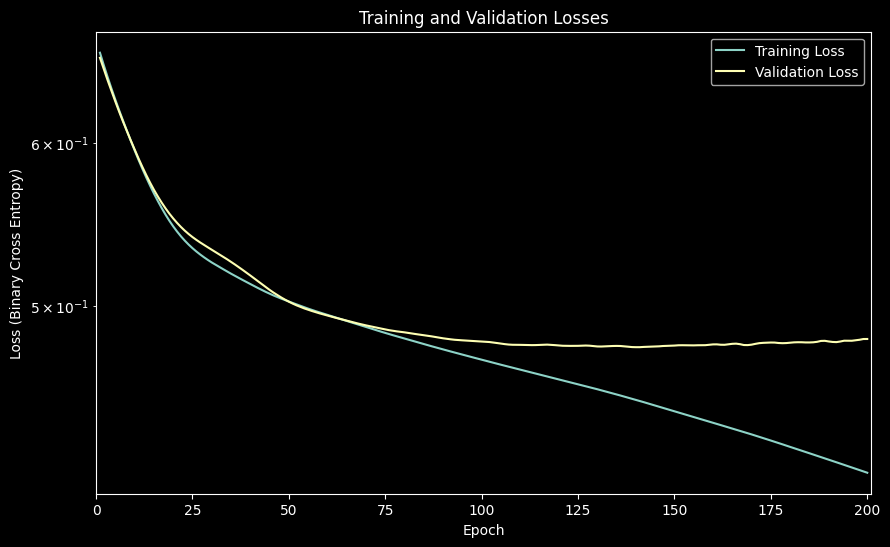

Neural Network Test Accuracy: 0.7541
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73        29
         1.0       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [50]:
RunNeuralNetwork(X_train, y_train, X_val, y_val, X_test, y_test, num_epochs=200, lr=0.001, verbose=True)